In [2]:
#IMPORTING THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
#IMPORTING THE DATA
data = pd.read_csv(r'C:\Users\Samwel\OneDrive\Desktop\English Lesson Notes\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#GETTING INSIGHTS FROM THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#DROP THE CustomerID column
data.drop('CustomerID', axis = 1, inplace = True)

In [14]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

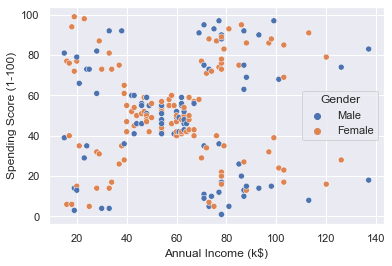

In [37]:
# Visualizing spending and income relationship
sns.scatterplot(data = data, x = data['Annual Income (k$)'],
               y = data['Spending Score (1-100)'],
                hue = 'Gender'
                )

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

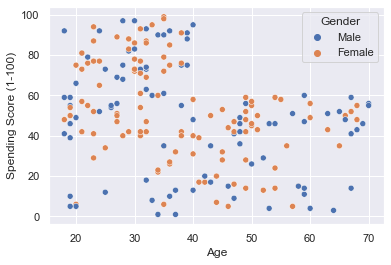

In [38]:
sns.scatterplot(data = data, x = data['Age'],
               y = data['Spending Score (1-100)'],
               hue = 'Gender')

C:\Users\Samwel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


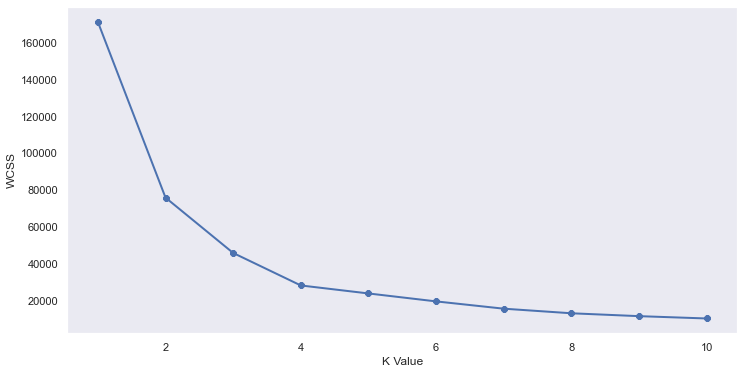

In [25]:
#CLUSTERING
X1 = data.loc[:,['Age', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, marker ='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
    


In [27]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)

[0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 0 0 1 3 0 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1
 3 1 3 2 3 2 0 1 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 3 0 3 2 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 2 3
 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [28]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]]


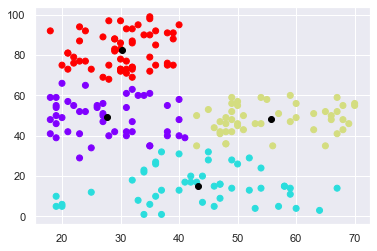

In [30]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

C:\Users\Samwel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


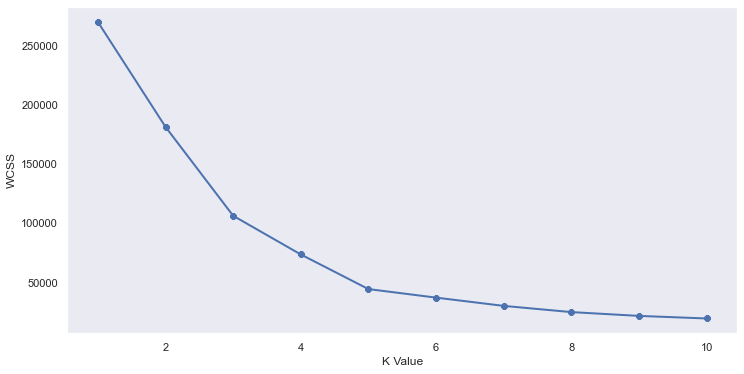

In [31]:
X2 = data.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, marker ='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
    

In [32]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [33]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


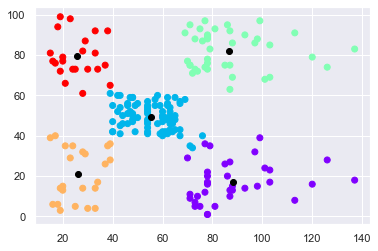

In [34]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()